<a href="https://colab.research.google.com/github/hardiksharma6555/MLP_code/blob/main/Week3_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import permutation_test_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor

In [4]:
np.random.seed(42)
plt.style.use('seaborn')

In [5]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [6]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

In [7]:
print('Shape of feature matrix : ', features.shape)
print('Shape of labels matrix : ', labels.shape)

Shape of feature matrix :  (20640, 8)
Shape of labels matrix :  (20640,)


In [8]:
assert (features.shape[0]==labels.shape[0])

In [9]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=42)

train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 8158 to 15795
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15480 non-null  float64
 1   HouseAge    15480 non-null  float64
 2   AveRooms    15480 non-null  float64
 3   AveBedrms   15480 non-null  float64
 4   Population  15480 non-null  float64
 5   AveOccup    15480 non-null  float64
 6   Latitude    15480 non-null  float64
 7   Longitude   15480 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [10]:
print('Number of training samples : ', train_features.shape[0])
print('Number of test samples : ', test_features.shape[0])

Number of training samples :  15480
Number of test samples :  5160


In [11]:
assert (train_features.shape[0] == train_labels.shape[0])
assert (test_features.shape[0] == test_labels.shape[0])

In [12]:
lin_reg_pipeline = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('lin_reg', LinearRegression())
])

lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [13]:
print('Intercept (w_0) : ',lin_reg_pipeline[-1].intercept_)
print()
print('Weight vector (w_1,w_2....,w_m) : \n' ,lin_reg_pipeline[-1].coef_)

Intercept (w_0) :  2.0703489205426377

Weight vector (w_1,w_2....,w_m) : 
 [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


In [14]:
train_score = lin_reg_pipeline.score(train_features, train_labels)
print('Model performance on train set :', train_score)

test_score = lin_reg_pipeline.score(test_features, test_labels)
print('Model performance on test set :', test_score)

Model performance on train set : 0.609873031052925
Model performance on test set : 0.5910509795491352


In [15]:
lin_reg_score = cross_val_score(lin_reg_pipeline, train_features, train_labels,scoring='neg_mean_squared_error' , cv=shuffle_split_cv)

print('Model performance on cross validation set : \n', lin_reg_score)

Model performance on cross validation set : 
 [-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]


In [16]:
print(
    f'Score of linear regression model on the test set : \n'f"{lin_reg_score.mean():.3f} +/- {lin_reg_score.std():.3f}")

Score of linear regression model on the test set : 
-0.529 +/- 0.022


In [17]:
lin_reg_mse = - lin_reg_score

print(
    f'MSE of linear regression model on the test set :\n' f'{lin_reg_mse.mean():.3f} +/- {lin_reg_mse.std():.3f}')

MSE of linear regression model on the test set :
0.529 +/- 0.022


#SGD REGRESSOR

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import permutation_test_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor

In [19]:
np.random.seed(306)
plt.style.use('seaborn')

In [20]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [21]:
features ,labels = fetch_california_housing(as_frame=True, return_X_y=True)


In [22]:
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)


In [23]:
train_features ,dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state=42)

In [24]:
sgd = SGDRegressor(random_state=42)
sgd.fit(train_features, train_labels) 

train_mae = mean_absolute_error(train_labels, sgd.predict(train_features)) 
dev_mae = mean_absolute_error(dev_labels, sgd.predict(dev_features)) 

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)

Train MAE:  312995824045833.75
Dev MAE:  315394681503071.94


In [25]:
sgd_pipeline = Pipeline([
    ('scaler' , StandardScaler()),
    ('sgd' , SGDRegressor())
])

sgd_pipeline.fit(train_features, train_labels) 

train_mae = mean_absolute_error(train_labels, sgd.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)

Train MAE:  312995824045833.75
Dev MAE:  315394681503071.94


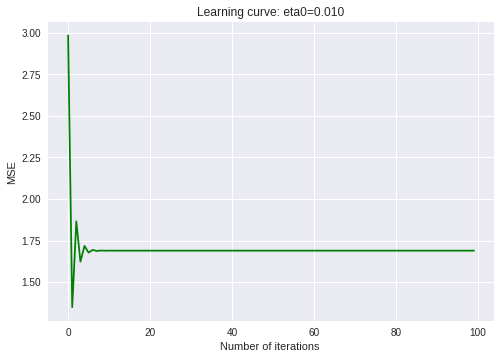

In [26]:
eta0 = 1e-2 
sgd_pipeline = Pipeline([
                        ('scaler', StandardScaler()),
                        ('sgd',SGDRegressor(max_iter=1, tol = -np.infty, warm_start=True, random_state=42))
])

loss = [] 

for epoch in range(100):
    sgd_pipeline.fit(train_features, train_labels) #continues where it left off 
    loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features))) 

plt.plot(np.arange(len(loss)), loss, 'g-')

plt.xlabel('Number of iterations ')
plt.ylabel('MSE')
plt.title(f'Learning curve: eta0={eta0:.3f}')
plt.show()


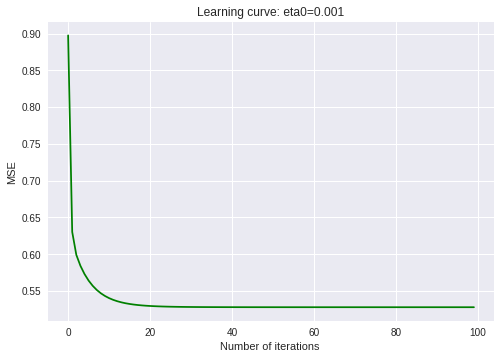

In [27]:
eta0 = 1e-3
sgd_pipeline = Pipeline([
                        ('feature_scaling', StandardScaler()),
                        ('sgd',SGDRegressor(max_iter=1, tol = -np.infty, warm_start=True, eta0=eta0,random_state=42))
])

loss = [] 

for epoch in range(100):
    sgd_pipeline.fit(train_features, train_labels) 
    loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features))) 

plt.plot(np.arange(len(loss)), loss, 'g-')

plt.xlabel('Number of iterations ')
plt.ylabel('MSE')
plt.title(f'Learning curve: eta0={eta0:.3f}')
plt.show()

In [28]:
print("Number of iteration before reaching convergence criteria :",sgd_pipeline[-1].n_iter_)

print("Number of weight updates : ", sgd_pipeline[-1].t_)

Number of iteration before reaching convergence criteria : 1
Number of weight updates :  11611.0


In [29]:
%%time
eta0 = [1e-5, 1e-4, 1e-3, 1e-2]

train_scores, test_scores = validation_curve(
    sgd_pipeline, com_train_features, com_train_labels, param_name="sgd__eta0", param_range=eta0, cv=shuffle_split_cv, scoring='neg_mean_squared_error', n_jobs=2
)

CPU times: user 363 ms, sys: 84.3 ms, total: 447 ms
Wall time: 4.49 s


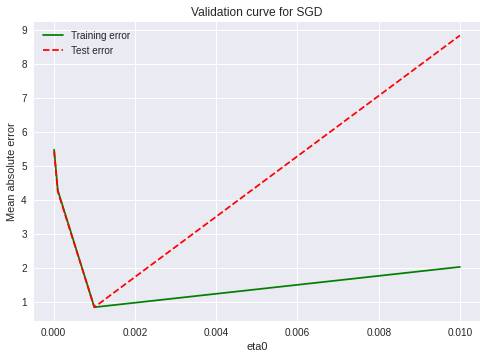

In [30]:
train_errors, test_errors = -train_scores, -test_scores

plt.plot(eta0, train_errors.mean(axis=1),'g-x',label='Training error')
plt.plot(eta0, test_errors.mean(axis=1),'r--x', label='Test error')

plt.legend() 
plt.xlabel('eta0')
plt.ylabel('Mean absolute error')
plt.title('Validation curve for SGD')
plt.show()

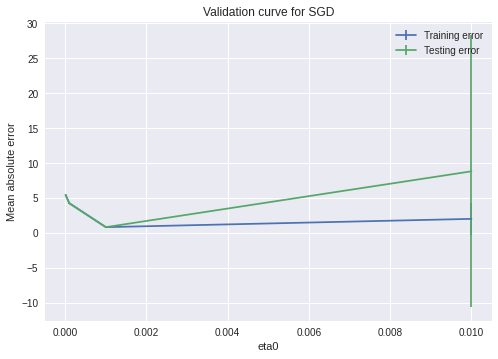

In [31]:
plt.errorbar(eta0, train_errors.mean(axis=1), yerr=train_errors.std(axis=1), label='Training error')

plt.errorbar(eta0, test_errors.mean(axis=1),yerr=test_errors.std(axis=1), label='Testing error')

plt.legend(loc='best') 
plt.xlabel('eta0')
plt.ylabel('Mean absolute error')
plt.title('Validation curve for SGD')
plt.show()

In [32]:
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=500,
                        early_stopping=True,
                        eta0=1e-3,
                        tol=1e-3,
                        validation_fraction=0.2,
                        n_iter_no_change=5,
                        average=10,
                        random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))

dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)

Train MAE:  0.579376454514559
Dev MAE:  0.5689180241137523

Number of SGD iterations : 7
Number of weight updates :  81271.0


In [33]:
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=500,
                         early_stopping=True,
                         eta0=1e-3,
                         tol=1e-3,
                         learning_rate= 'constant',
                         validation_fraction=0.2,
                         n_iter_no_change=5,
                         average=10,
                         random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(
    train_labels, sgd_pipeline.predict(train_features))

dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)

Train MAE:  0.5359339681114987
Dev MAE:  0.5151099728924144

Number of SGD iterations : 8
Number of weight updates :  92881.0


In [34]:
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=500,
                         early_stopping=True,
                         eta0=1e-3,
                         tol=1e-3,
                         learning_rate='adaptive',
                         validation_fraction=0.2,
                         n_iter_no_change=5,
                         average=10,
                         random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae = mean_absolute_error(
    train_labels, sgd_pipeline.predict(train_features))

dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))

print('Train MAE: ', train_mae)
print('Dev MAE: ', dev_mae)
print()

# development set dev set
print('Number of SGD iterations :', sgd_pipeline[-1].n_iter_)
print('Number of weight updates : ', sgd_pipeline[-1].t_)

Train MAE:  0.5340193046836148
Dev MAE:  0.5198356196858102

Number of SGD iterations : 33
Number of weight updates :  383131.0
